In [76]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Metrics for Binary Classification

 * For **binary** classification, we often speak of a **positive class** and a **negative class**, with the understanding that the positive class is the one we are looking for.
 * Often, accuracy is not a good measure of predictive performance. Consider this: Let us assume 99% of emails are real and 1% is spam. If we create a model which predicts the emails to be 100% real we would essentially get 99% accurate model, which is in this case would be useless for us since it does not predict any spam emails.
 
#### Let's use Logistic Regression for demo

In [14]:
# data where target is number 9
digits = datasets.load_digits()

X = digits.data
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# init, train, predict
logi_reg = LogisticRegression(C=0.1, solver='liblinear').fit(X_train, y_train)
y_pred = logi_reg.predict(X_test)
print("Logistic Regression accuracy: {:.3f}".format(logi_reg.score(X_test, y_test)))

Logistic Regression accuracy: 0.978


Let’s inspect the predictions of LogisticRegression using the confusion_matrix function.

In [15]:
# confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


## Confusion matrix

The output of binary classification confusion_matrix is a two-by-two array, where the rows correspond to the true classes and the columns correspond to the predicted classes. Each entry counts how often a sample that belongs to the class corresponding to the row (here, “not nine” and “nine”) was classified as the class corresponding to the column. The following plot illustrates this meaning:

<img src="img/conf.png" alt="Drawing" style="width: 400px;"/>

Entries on the main diagonal of the confusion matrix correspond to correct classifications, while other entries tell us how many samples of one class got mistakenly classified as another class. 

If we declare “a nine” the positive class, we can relate the entries of the confusion matrix with the terms false positive and false negative. To complete the picture, we call correctly classified samples belonging to the positive class true positives and correctly classified samples belonging to the negative class true negatives. These terms are usually abbreviated FP, FN, TP, and TN and lead to the following interpretation for the confusion matrix:

<img src="img/conf2.png" alt="Drawing" style="width: 400px;"/>

Confusion matrices help determining which model classifies better.

### Accuracy

We know that accuracy is the number of correct predictions (TP and TN) divided by the number of all samples:
$$\text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN}$$

### Precision

 * Precision measures how many of the samples predicted as positive are actually positive:
 
 $$\text{Precision} = \frac{TP}{TP+FP} $$
 <br>
 * Used as a performance metric when the goal is to **limit** the number of **false positives**.
 * Precision is also known as positive predictive value (PPV).
 
### Recall

 * Measures how many of the positive samples are captured by the positive predictions:
 
 $$\text{Recall} = \frac{TP}{TP+FN} $$
 <br>
 * Used as performance metric when it is important to avoid false negatives.
 * Other names for recall are sensitivity, hit rate, or true positive rate (TPR)
 
**NB!** In the machine learning community, precision and recall are arguably the most commonly used
measures for binary classification, but other communities might use other related metrics.

There is a trade-off between optimizing recall and optimizing precision. while precision and recall are very important measures, looking at only one of them will not provide you with the full picture. 

### f-score

 * One way to summarize them is the **f-score** or f-measure, which is with the harmonic mean of precision and recall:
 
 $$ \text{F} = 2 \cdot \frac{\text{precision}\cdot \text{recall}}{\text{precision}+\text{recall}}$$
<br>
Let’s run it on the predictions for the “nine vs. rest” dataset that we computed earlier. Here, we will assume that the “nine” class is the positive class (it is labeled as True while the rest is labeled as False ), so the positive class is the minority class:

In [17]:
print("f1 score logistic regression: {:.3f}".format(f1_score(y_test, y_pred)))

f1 score logistic regression: 0.886


 * A disadvantage of the f-score, however, is that it is harder to interpret and explain than accuracy.

### Classification Report
 * If we want a more comprehensive summary of precision, recall, and f 1 -score, we can use the classification_report convenience function to compute all three at once, and print them in a nice format:

In [19]:
print(classification_report(y_true=y_test, y_pred=y_pred, target_names=['not nine', 'nine']))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



 * Setting a requirement on a classifier like 90% recall is often called setting the operating point. Fixing an operating point is often helpful in business settings to make performance guarantees to customers or other groups inside your organization.
 * Often, when developing a new model, it is not entirely clear what the operating point will be. For this reason, and to understand a modeling problem better, it is instructive to look at all possible thresholds, or all possible trade-offs of precision and recalls at once.

### ROC (Receiver Operating Characteristics) Curve

 * Visual evaluation of models contrary to confusion matrix and classification report.
 * Used to analyze the behavior of classifiers at different thresholds.
 * ROC curve considers all possible thresholds for a given classifier, it shows the false positive rate (FPR) against the true positive rate (TPR).
 * TPR == Recall
 * The false positive rate is the fraction of false positives out of all negative samples:
 $$\text{FPR} = \frac{FP}{FP+TN}$$
 <br>

In [26]:
# import diabetes data
diab = pd.read_csv('data/diabetes.csv', header=0)
diab.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [28]:
# data
X = diab.drop('diabetes', axis=1)
y = diab.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# init, fit, predict probabilities
logi_reg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_proba = logi_reg.predict_proba(X_test)
y_pred_proba[:2,] 

array([[0.6631067 , 0.3368933 ],
       [0.77597349, 0.22402651]])

The classifier outputs a probability matrix of dimension (N,2). The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. These two would sum to 1.

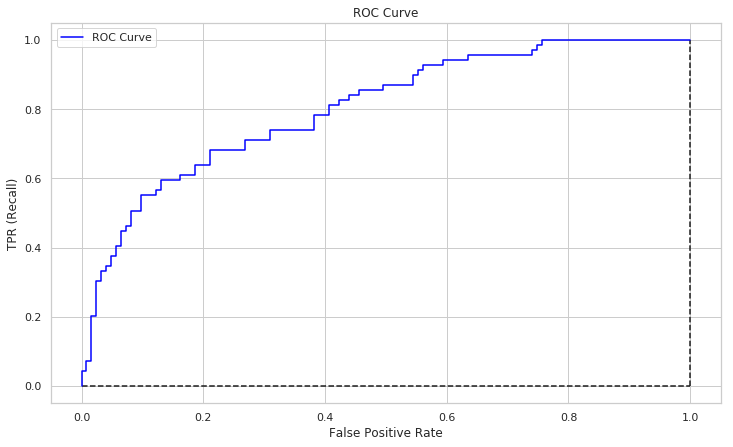

In [95]:
# extract probabilities that the patient has diabetes
y_pred_prob = y_pred_proba[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

'''fpr - Increasing false positive rates such that element i 
       is the false positive rate of predictions with score >= thresholds[i].

tpr - Increasing true positive rates such that element i 
       is the true positive rate of predictions with score >= thresholds[i].

thresholds - Increasing true positive rates such that element i 
              is the true positive rate of predictions with score >= thresholds[i].'''

# Plot ROC curve
sns.set(style='whitegrid')
plt.figure(figsize=[12,7])
plt.plot([0, 1], [0, 0], 'k--')
plt.plot([1, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('TPR (Recall)')
plt.legend()
plt.title('ROC Curve')
plt.show()

**The ideal curve is close to the top left: you want a classifier that produces a high recall while keeping a low false positive rate. Depending on the problem at hand this may vary.**

### AUC (Area Under ROC Curve)

 * We often want to summarize the ROC curve using single number, the area under the curve.

In [77]:
logi_reg_auc = roc_auc_score(y_test, logi_reg.predict_proba(X_test)[:,1])

print("Logistic Regression AUC: {:.3f}".format(logi_reg_auc))

Logistic Regression AUC: 0.803


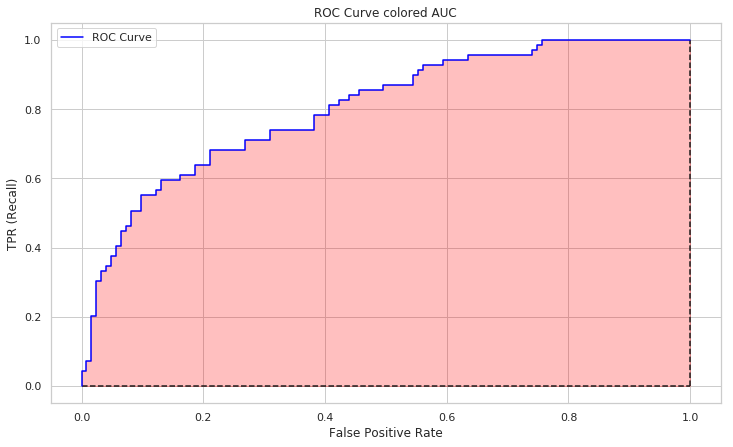

In [98]:
# Plot ROC curve with AUC colored
sns.set(style='whitegrid')
plt.figure(figsize=[12,7])
plt.plot([0, 1], [0, 0], 'k--')
plt.plot([1, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.fill_between(fpr, tpr, alpha=0.25, color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('TPR (Recall)')
plt.legend()
plt.title('ROC Curve colored AUC')
plt.show()

 * Recall that because average precision is the area under a curve that goes from 0 to 1, average precision always returns a value between 0 (worst) and 1 (best). Predicting randomly always produces an AUC of 0.5, no matter how imbalanced the classes in a dataset are. This makes AUC a much better metric for imbalanced classification problems than accuracy.
 * If the AUC is greater than 0.5, the model is better than random guessing.